In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import dataset packages
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# import from project files
from utils import plot_2d, plot_classifier_boundary, test_model

## Dataset Generation ## 

### Logistic Regression ###

Assumptions: 
- By default, logistic regression assumes that the outcome variable is binary 
- Linearity of independent variables and log-odds
- Logistic regression assumes that there are no highly influential outlier data points, as they distort the outcome and accuracy of the model
- When the classes are well-separated, the parameter estimates for logistic regression are surprisingly unstable. Coefficients may go to infinity. LDA doesn't suffer from this problem. --> If there are covariate values that can predict the binary outcome perfectly then the algorithm of logistic regression, i.e. Fisher scoring, does not even converge. This is the extreme case of perfect separation but even if the data are only separated to a great degree and not perfectly, the maximum likelihood estimator might not exist and even if it does exist, the estimates are not reliable.(see: https://stats.stackexchange.com/questions/188416/discriminant-analysis-vs-logistic-regression)


Advantages: 
- Groups can have different n
- Not too sensitive to outliers (See: https://stats.stackexchange.com/questions/95247/logistic-regression-vs-lda-as-two-class-classifiers)


Disadvantages:
- main differences to LDA with small samples, as their distributions vary too much for the LR to be  able  to  give  good  result


### LDA ###

Assumptions:
- Distributional assumptions: ultivariate normality of all predictors. 
- The within-group covariance matrices should be identical in population. (See: https://stats.stackexchange.com/questions/95247/logistic-regression-vs-lda-as-two-class-classifiers)


Disadvantages: 
- Groups should have similar n
- Quite sensitive to outliers

In [2]:
# Generate dataset where logistic regression performs better
def data_lr():

    def classify(x, y):
        func = 4 * x - 1
        return int(func / y > 1) # 1 or 0 as label

    X = np.random.rand(1000, 2) * 10
    y = np.asarray([classify(x, y) for x, y in X])

    return X, y

In [3]:
#g Generate dataset where LDA works better
def data_lda():
    
    X, y = make_classification(
        n_samples=100,
        n_features=2, 
        n_redundant=0, 
        n_informative=2, 
        class_sep=0.2,
        flip_y=0.01, 
        n_clusters_per_class=1,
        weights=[0.9, 0.1],
        random_state=1,
        )
                    
    return X, y

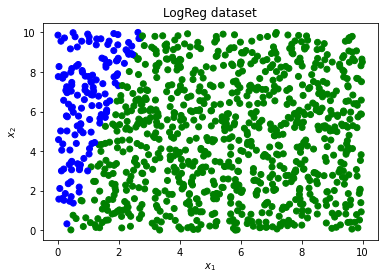

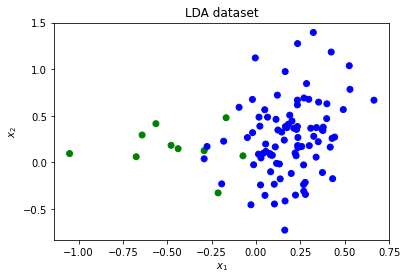

In [4]:
# LogReg data generation and splitup
lr_X, lr_y = data_lr()
plot_2d(lr_X, lr_y, 'LogReg dataset')

lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, lr_y, test_size=.33, random_state=42)

# LDA data generation and splitup
lda_X, lda_y = data_lda()
plot_2d(lda_X, lda_y, 'LDA dataset')

lda_X_train, lda_X_test, lda_y_train, lda_y_test = train_test_split(lda_X, lda_y, test_size=.33, random_state=42)


## Dataset LR - Logistic Regression ##

#### Logistic Regression better than LDA ####

LDA makes assumptions about the distribution of the data. It has to be a normal distribution and all classes need to share a covariance matrix. Dataset LR fulfills neither of those assumptions, but it has a strictly linear separation boundary without outliers and is a binary class problem. These characteristics are what LogReg assumes. Therefore, LogReg is able to approximate this line almost perfectly, while LDA, due to the unfulfilled assumptions struggles to find an optimal approximation. 

LogReg Performance on Dataset LR:
AUC score: 0.993
AUC score list: [0.9905660377358491, 0.998220640569395, 1.0, 0.9964539007092199, 1.0, 0.9897959183673469, 0.9963768115942029, 0.9895833333333333, 0.9838487446417638, 0.9895833333333333]


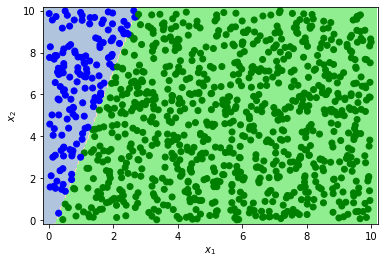

LDA Performance on Dataset LR:
AUC score: 0.919
AUC score list: [0.8876488095238095, 0.9564285714285715, 0.9063839058755174, 0.9476946762823109, 0.9628571428571429, 0.8463894681960374, 0.9149305555555556, 0.8927133655394525, 0.9431818181818181, 0.9284903978607892]


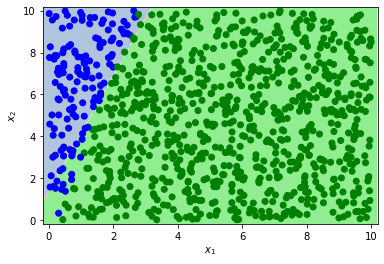

In [5]:
# LogReg > LDA

print('LogReg Performance on Dataset LR:')
logreg = LogisticRegression(max_iter=1000)
test_model(logreg, lr_X, lr_y)

print('LDA Performance on Dataset LR:')
lda = LDA()
test_model(lda, lr_X, lr_y)


## Dataset LDA - Linear Discriminant Analysis ##

#### LDA better than Logistic Regression ####

Dataset LDA consists of to normally distributed classes, each with one cluster. The classes are very unbalanced and only have a few samples. This is a difficult classification problem, due to outliers, overlap, imbalance and the small dataset. But LDA is able to perform well, because the assumption about the data distribution is met, while LogReg struggles to correctly place the decision boundary. It places the boundary too far into the cluster of the smaller class, therefore mislabeling data points of that set. 

LogReg Performance on Dataset LDA:
AUC score: 0.573
AUC score list: [0.5, 0.6, 0.625, 0.5, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5]


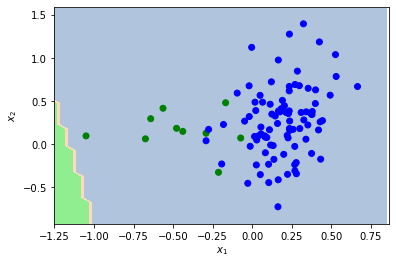



LDA Performance on Dataset LDA:
AUC score: 0.808
AUC score list: [0.6666666666666666, 0.96875, 0.8821428571428571, 0.5, 0.5, 0.625, 0.9838709677419355, 0.96875, 0.984375, 1.0]


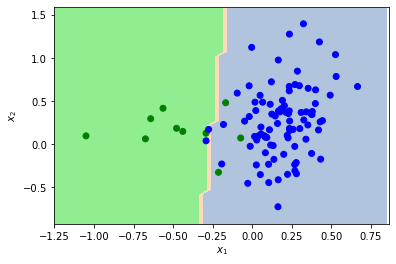

In [6]:
# LogReg < LDA

print('LogReg Performance on Dataset LDA:')
logreg = LogisticRegression(max_iter=1000)
test_model(logreg, lda_X, lda_y)
print('LDA Performance on Dataset LDA:')
lda = LDA()
test_model(lda, lda_X, lda_y)  # TODO: Sometimes no sample of smaller dataset, catch error and repeat till works!
